In [1]:
# Supervised Machine Learning Classification Algos on UCI Bank Marketing Dataset
# Models - 1) Logistic Regression 2) NBayes 3) SVM 4) KNN 5) DT 6) Random Forest 7) GBM Classifier
# Other Stuff - Curves, ROC, Model Fit Diagnostics, Prediction, Model Comparisons
# Additional Stuff - Cross-Validation, GridSearchCV

In [2]:
import pandas as pd
import numpy as np

from pandas import Series,DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pwd

'C:\\Users\\anuj - laptop\\Desktop\\bank-additional'

In [4]:
pd.options.display.max_columns = 100
bank = pd.read_csv("bank-additional-full.csv", sep = ';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Since we are aiming to build classification model with only 2 classes, we will remove the unknown class from 'default':

print(bank.default.value_counts())
print(bank.y.value_counts())

# Check- the target variable here is Y - whether customer has subscrived to the campaign or not

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
no     36548
yes     4640
Name: y, dtype: int64


In [6]:
# Ass we can see for y = 'yes' cases just represent = 4640/36548 = 12.5 % - very much under represented
# So, we will oversample the data in the Training Set

In [7]:
target = bank['y'] 

predictors_1 = bank.drop("y",axis = 1)
predictors_2 = bank.iloc[:,bank.columns != 'y']

predictors_2.shape
target.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [8]:
# Using GetDUmmies:

bank_dummies = pd.get_dummies(predictors_2[['job','marital','education','housing','loan','contact','month','day_of_week','campaign','previous','poutcome','default']])

In [9]:
bank_dummies.head()

,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default_no,default_unknown,default_yes
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [10]:
bank_predictors_final = pd.concat([predictors_2, bank_dummies], axis = 1)

bank_predictors_final.shape

(41188, 75)

In [11]:
bank_predictors_final.drop(['job','marital','education','housing','loan','contact','month','day_of_week','campaign','previous','poutcome','default'], axis = 1, inplace = True)
bank_predictors_final.shape

(41188, 61)

In [12]:
bank_predictors_final.head()

,age,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default_no,default_unknown,default_yes
0,56,261,999,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,57,149,999,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,37,226,999,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,40,151,999,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,56,307,999,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [13]:
# Train and Test SPlits:

# Before Doing Train/Test Splits we need to transform Target Variable as well using Label Encoder
# The Predictor Variables also need to be transformed using pd.get_Dummies

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

target_le = le.fit_transform(target)

print(le.classes_)
print(le.inverse_transform(target_le))
print(target_le.shape)

print(Series(target_le).value_counts())


['no' 'yes']
['no' 'no' 'no' ... 'no' 'yes' 'no']
(41188,)
0    36548
1     4640
dtype: int64


In [14]:
# Experimental: LabelBinariser - just to see how it works - it needs discrete int values as input would not work with strings

# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# Y_train_lb = lb.fit_transform(Y_train)
# Y_train_lb

# print(lb.classes_)
# print(lb.inverse_transform(Y_train_lb))
# Y_train_lb

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(bank_predictors_final, target_le)

In [16]:
# Oversampling the underrepresented class of y -1 using the imblearn library in python:

from imblearn import over_sampling
over_sample = over_sampling.SMOTE(random_state= 10, sampling_strategy = 'float', ratio = 0.35 )

# Applying Over-Sampling only on the Train DataSet:

over_sample.fit_sample

X_train_resample, Y_train_resample = over_sample.fit_sample(X_train, Y_train)


In [17]:
# Models: Logistic, DT, NB, SVM, KNN, 

In [18]:
bank_predictors_final.shape

(41188, 61)

In [19]:
X_train_resample.shape

(37006, 61)

In [33]:
Series(Y_test).value_counts()

0    9136
1    1161
dtype: int64

In [20]:
# We will starting with logistic:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'ovr', random_state=0, solver='liblinear')
lr.fit(X_train_resample, Y_train_resample)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
predicted = lr.predict(X_test)

In [58]:
predicted_proba = DataFrame(lr.predict_proba(X_test))

Y_proba = predicted_proba.iloc[:,1].head()

np.where(Y_proba > 0.9,1,0)

array([0, 0, 0, 0, 0])

array([0.       , 0.0724606, 1.       ])

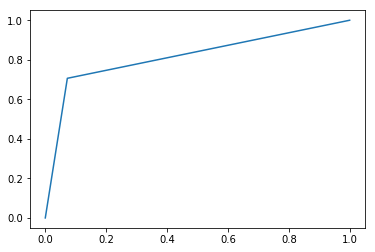

In [62]:
fpr, tpr, thresholds = roc_curve(Y_test,lr.predict(X_test))

Series(thresholds)

plt.plot(fpr,tpr)

fpr

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
roc_auc_score(Y_test,lr.predict(X_test))

0.8169135437926421

In [35]:
thresholds

array([2, 1, 0])

In [22]:
pd.Series(predicted).value_counts()

0    8815
1    1482
dtype: int64

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,roc_curve, recall_score, precision_score, classification_report

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_test_le  = le.fit_transform(Y_test)

In [25]:
print("confusion matrix\n",confusion_matrix(Y_test,lr.predict(X_test), labels = [0,1,2]))
print("\nclassification report:\n",classification_report(Y_test,lr.predict(X_test)))

print("accuracy_score:",accuracy_score(Y_test,lr.predict(X_test)))
print("precision_score:",precision_score(Y_test,lr.predict(X_test)))

print("recall_score:",recall_score(Y_test,lr.predict(X_test)))



confusion matrix
 [[8561  589    0]
 [ 358  789    0]
 [   0    0    0]]

classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      9150
           1       0.57      0.69      0.62      1147

   micro avg       0.91      0.91      0.91     10297
   macro avg       0.77      0.81      0.79     10297
weighted avg       0.92      0.91      0.91     10297

accuracy_score: 0.9080314654753812
precision_score: 0.5725689404934688
recall_score: 0.6878814298169137


In [57]:
# Cross-Validation of the Logistic Regression Model built using K-fold Cross Validation #cross_val_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

oob = KFold(n_splits = 5, random_state = 10, shuffle=True)

lr_oob_score = cross_val_score(lr,X_train_resample, Y_train_resample, scoring = 'recall', cv = oob)

print(lr_oob_score, '\n Mean:', lr_oob_score.mean())

[0.67679413 0.66841004 0.66702413 0.67573222 0.66147664] 
 Mean: 0.6698874332113134


In [58]:
# As we see, very low recall/precision score for our target class: only 45% and 66%.
# Solution is over sampling of y = 1 class

# As we can see after implementing over-sampling: the recall/precision score are 70% and 55%, not much hit on precision, 
# but from confusion matrix we can see over-sampling improves the results significantly

In [27]:
# 2. Decision Tree with GridSearch

In [28]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

p_grid = {'max_depth' : np.arange(1,10), 'min_samples_split' : [500,800]}
scor = 'recall'

dt = GridSearchCV(DecisionTreeClassifier(), p_grid, cv = 10, scoring = scor)

dt.fit(X_train_resample, Y_train_resample)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': [500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [38]:
print(dt.best_params_,'\n',dt.best_score_,'\n',dt.classes_,'\n',dt.param_grid,'\n',dt.n_splits_,'\n',dt.scorer_)

{'max_depth': 4, 'min_samples_split': 800} 
 0.8343970303698305 
 [0 1] 
 {'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': [500, 800]} 
 10 
 make_scorer(recall_score)


In [39]:
DataFrame(dt.cv_results_)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.094474,0.019006,0.002795,0.000713,1,500,"{'max_depth': 1, 'min_samples_split': 500}",0.479666,0.459854,0.481752,0.499479,0.445255,0.470282,0.469239,0.473410,0.482795,0.486430,0.474815,0.014247,17,0.474276,0.476477,0.474044,0.472074,0.478100,0.475319,0.475435,0.474971,0.473928,0.473526,0.474815,0.001583
1,0.066178,0.009819,0.001952,0.000347,1,800,"{'max_depth': 1, 'min_samples_split': 800}",0.479666,0.459854,0.481752,0.499479,0.445255,0.470282,0.469239,0.473410,0.482795,0.486430,0.474815,0.014247,17,0.474276,0.476477,0.474044,0.472074,0.478100,0.475319,0.475435,0.474971,0.473928,0.473526,0.474815,0.001583
2,0.122324,0.020165,0.002698,0.000743,2,500,"{'max_depth': 2, 'min_samples_split': 500}",0.755996,0.744526,0.749739,0.772680,0.742440,0.765381,0.778936,0.767466,0.766423,0.771399,0.761498,0.011925,13,0.755852,0.756663,0.764542,0.767903,0.758517,0.762341,0.783314,0.754114,0.762225,0.768161,0.763363,0.008098
3,0.107498,0.015507,0.002202,0.000675,2,800,"{'max_depth': 2, 'min_samples_split': 800}",0.755996,0.744526,0.749739,0.772680,0.742440,0.765381,0.778936,0.767466,0.766423,0.771399,0.761498,0.011925,13,0.755852,0.756663,0.764542,0.767903,0.758517,0.762341,0.783314,0.754114,0.762225,0.768161,0.763363,0.008098
4,0.144631,0.013143,0.002098,0.000993,3,500,"{'max_depth': 3, 'min_samples_split': 500}",0.706986,0.641293,0.654849,0.696559,0.689260,0.691345,0.712200,0.767466,0.766423,0.727557,0.705391,0.039137,15,0.734647,0.693048,0.699768,0.689455,0.724565,0.687138,0.715180,0.754114,0.762225,0.720311,0.718045,0.025131
5,0.140837,0.015629,0.002102,0.000433,3,800,"{'max_depth': 3, 'min_samples_split': 800}",0.706986,0.641293,0.654849,0.696559,0.689260,0.691345,0.712200,0.767466,0.766423,0.727557,0.705391,0.039137,15,0.734647,0.693048,0.699768,0.689455,0.724565,0.687138,0.715180,0.754114,0.762225,0.720311,0.718045,0.025131
6,0.164648,0.006579,0.001797,0.000245,4,500,"{'max_depth': 4, 'min_samples_split': 500}",0.773723,0.710115,0.734098,0.803962,0.877998,0.872784,0.880083,0.838373,0.843587,0.906054,0.824073,0.063044,2,0.839397,0.795249,0.814137,0.830939,0.849247,0.835342,0.857242,0.813441,0.818540,0.868266,0.832180,0.021241
7,0.163446,0.006763,0.001807,0.000245,4,800,"{'max_depth': 4, 'min_samples_split': 800}",0.807091,0.726799,0.757039,0.827946,0.882169,0.872784,0.880083,0.838373,0.843587,0.908142,0.834397,0.054525,1,0.854229,0.805794,0.824450,0.845771,0.867323,0.835342,0.857242,0.813441,0.818540,0.873595,0.839573,0.022374
8,0.190046,0.004529,0.001953,0.000152,5,500,"{'max_depth': 5, 'min_samples_split': 500}",0.732013,0.708029,0.710115,0.755996,0.846715,0.855057,0.800834,0.850886,0.843587,0.815240,0.791845,0.056894,9,0.823870,0.822596,0.819235,0.797914,0.802549,0.811008,0.762688,0.828389,0.818540,0.764454,0.805124,0.022639
9,0.189844,0.004060,0.001954,0.000146,5,800,"{'max_depth': 5, 'min_samples_split': 800}",0.803962,0.737226,0.771637,0.798749,0.866528,0.855057,0.800834,0.850886,0.843587,0.835073,0.816352,0.039072,3,0.854114,0.831866,0.855041,0.825029,0.838702,0.811008,0.762688,0.828389,0.818540,0.788089,0.821347,0.027103


In [59]:
# 2. Decision Tree with K-fold Cross Validation: